In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3 

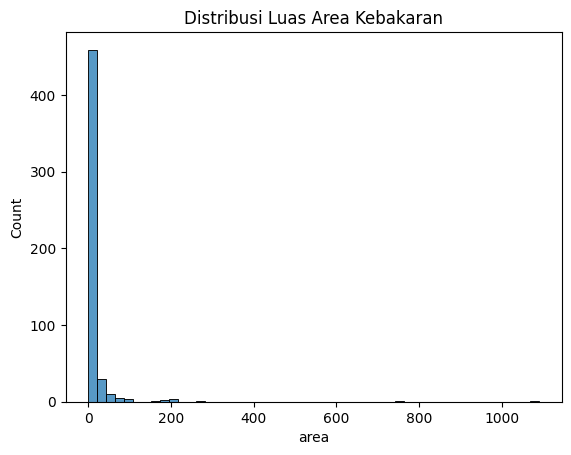

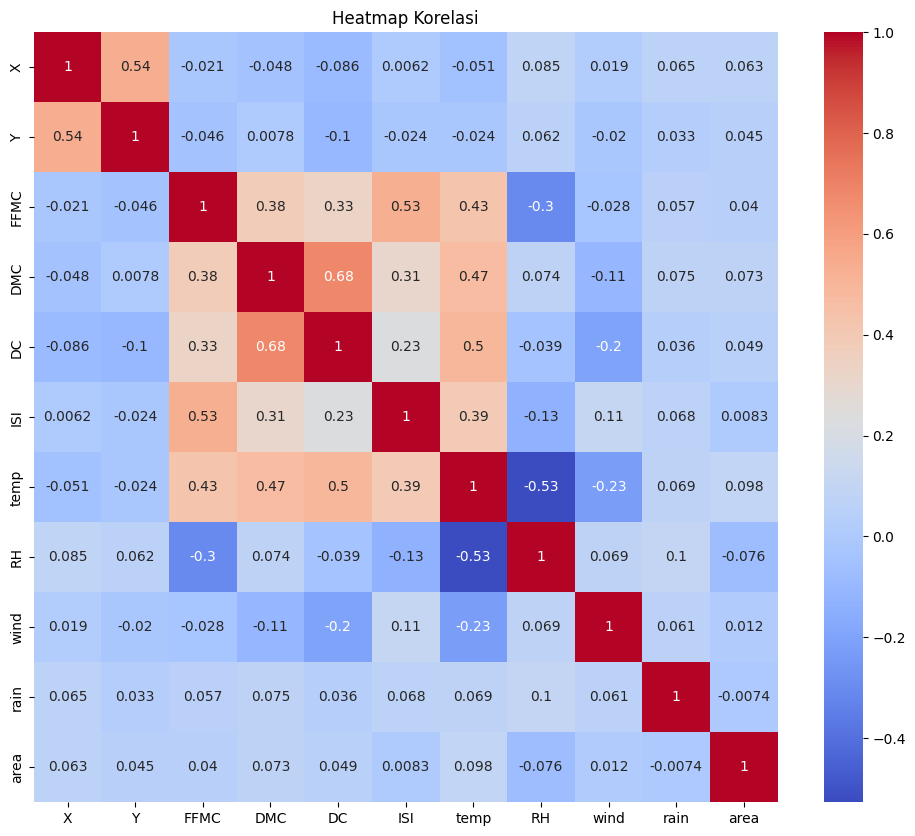

In [4]:
sns.histplot(df['area'], bins=50)
plt.title('Distribusi Luas Area Kebakaran')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [5]:
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)

In [6]:
df['area_log'] = np.log1p(df['area'])

In [7]:
X = df.drop(['area', 'area_log'], axis=1)
y = df['area_log']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [12]:
print("Evaluasi Regresi Linier:")
print("MSE:", mean_squared_error(y_test, lr_pred))
print("R^2:", r2_score(y_test, lr_pred))

print("\nEvaluasi Random Forest:")
print("MSE:", mean_squared_error(y_test, rf_pred))
print("R^2:", r2_score(y_test, rf_pred))

Evaluasi Regresi Linier:
MSE: 2.30151266147102
R^2: -0.047159971473461404

Evaluasi Random Forest:
MSE: 2.323440596974363
R^2: -0.05713691259594755


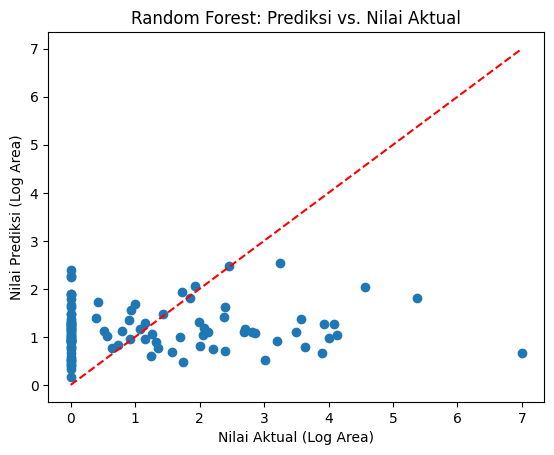

In [13]:
plt.scatter(y_test, rf_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Nilai Aktual (Log Area)')
plt.ylabel('Nilai Prediksi (Log Area)')
plt.title('Random Forest: Prediksi vs. Nilai Aktual')
plt.show()